# Machine Learning using Python 
Exam – Paper 1

Dataset:bank1
## Mayur V Kolki PGA14

# Part I: Supervised Learning 

Given is the ‘Portugal Bank Marketing’ dataset:

In [1]:
#important libraries 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.preprocessing import LabelEncoder #(specially use to for only y )
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

In [3]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [4]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/Paper1/bank1.csv"
data=pd.read_csv(path)

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
#data summary 
data.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [9]:
nc

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype=object)

In [10]:
fc

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y'], dtype=object)

In [11]:
data.describe().astype(np.int64)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
mean,40,258,2,962,0,0,93,-40,3,5167
std,10,259,2,186,0,1,0,4,1,72
min,17,0,1,0,0,-3,92,-50,0,4963
25%,32,102,1,999,0,-1,93,-42,1,5099
50%,38,180,2,999,0,1,93,-41,4,5191
75%,47,319,3,999,0,1,93,-36,4,5228
max,98,4918,56,999,7,1,94,-26,5,5228


In [12]:
#EDA
#NULL CHECK
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
#0 check 
data[nc][data[nc]==0].count()

age                   0
duration              4
campaign              0
pdays                15
previous          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

In [14]:
data.duration[data['duration'] == 0]

6251     0
23031    0
28063    0
33015    0
Name: duration, dtype: int64

In [15]:
data.pdays[data['pdays'] == 0]

25497    0
25996    0
30238    0
30314    0
30417    0
30688    0
40360    0
40364    0
40365    0
40376    0
40380    0
40382    0
40384    0
40387    0
40534    0
Name: pdays, dtype: int64

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

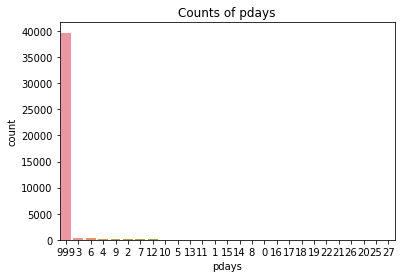

In [16]:
sns.countplot(x='pdays' , data= data , order = data['pdays'].value_counts().index)
plt.title('Counts of pdays')
data.pdays.value_counts()

In [17]:
(data['pdays'].value_counts()/len(data.pdays))*100

999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
19      0.007284
22      0.007284
21      0.004856
26      0.002428
20      0.002428
25      0.002428
27      0.002428
Name: pdays, dtype: float64

### this analysis tells us that this column is biased which can affect your output due to singularity ,so we will drop this column

In [18]:
data.previous 

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: previous, Length: 41188, dtype: int64

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

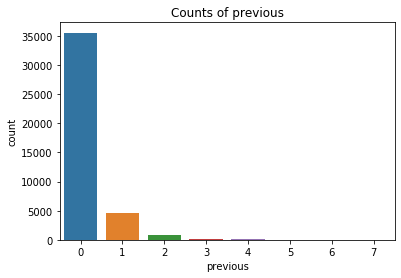

In [19]:
sns.countplot(x='previous' , data= data , order = data['previous'].value_counts().index)
plt.title('Counts of previous')
data.previous.value_counts()

In [20]:
(data['previous'].value_counts()/len(data.previous))*100

0    86.343110
1    11.073614
2     1.830630
3     0.524425
4     0.169952
5     0.043702
6     0.012139
7     0.002428
Name: previous, dtype: float64

In [21]:
dc =data.columns
dc

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Q1.What does the primary analysis of several categorical features reveal?

In [22]:
for i in dc:
    print("columns = ", i ,"\n",data[i].unique(),"\n")
    print((data[i].value_counts()/data.shape[0])*100)

columns =  age 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

31    4.727105
32    4.481888
33    4.450325
36    4.321647
35    4.270661
        ...   
89    0.004856
91    0.004856
87    0.002428
94    0.002428
95    0.002428
Name: age, Length: 78, dtype: float64
columns =  job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64
columns =  marital 


In [23]:
for f in fc:
    print("columns = ", f ,"\n",data[f].unique(),"\n")
    print((data[f].value_counts()/data.shape[0])*100)

columns =  job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64
columns =  marital 
 ['married' 'single' 'divorced' 'unknown'] 

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
columns =  education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.

### To get a feel for the type of data we are dealing with, we visualize distributions of numerical features with histograms

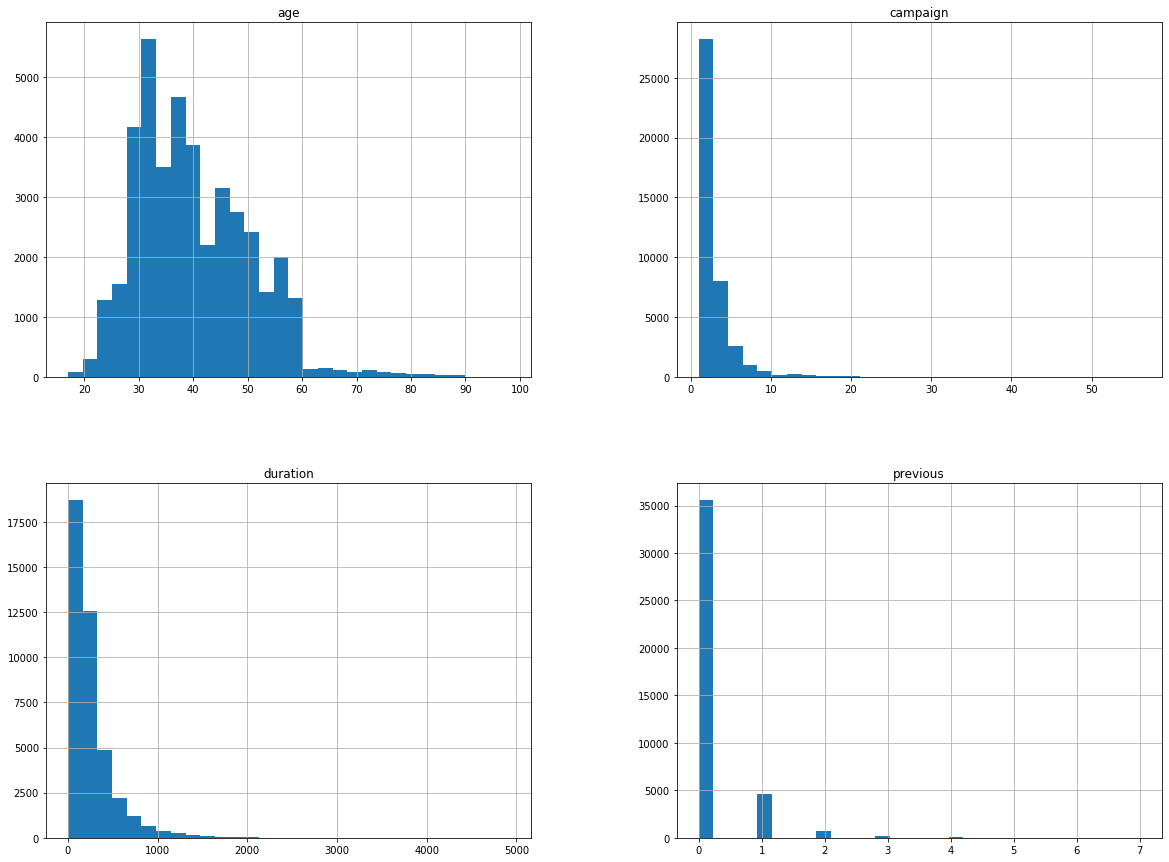

In [24]:
%matplotlib inline
data[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

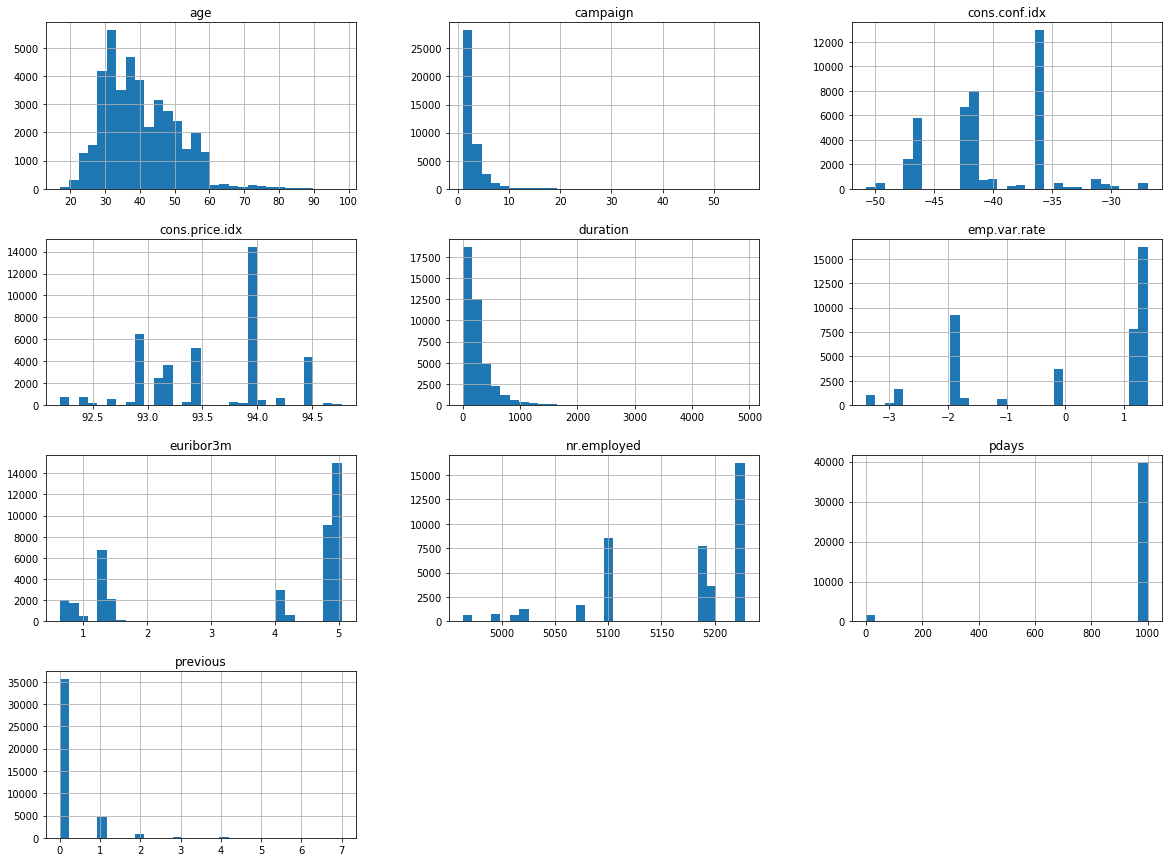

In [25]:
%matplotlib inline
data[nc].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

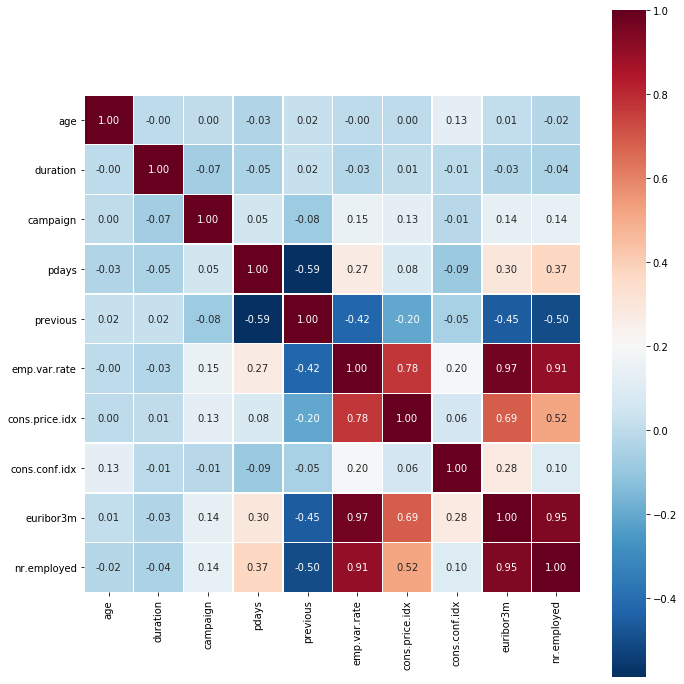

In [26]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [27]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
data[nc]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


Text(0.5, 1, 'HeatMap Correlation Matrix')

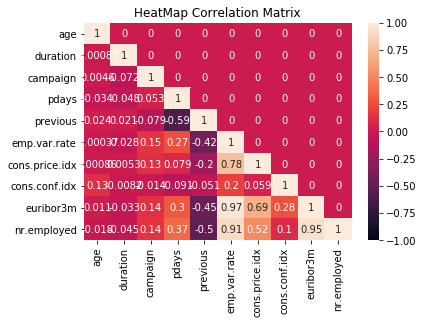

In [29]:
# Checking for Multicolinearity.

cor = data[nc].corr()
cor = np.tril(cor)
sns.heatmap(cor , xticklabels = nc , yticklabels = nc ,
 vmin = -1 , vmax = 1 , annot=True , square = False)
plt.title('HeatMap Correlation Matrix') 

Most of our features are category type; hence, this heatmap does not help much. We can see that duration is a good indicator, however, this value has only known when the call is done.

#### Print unique values for each column

In [30]:
category_features = data.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


In [31]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(data[col].value_counts(), "\n")
    
print(data.nunique(axis=1))

job 
--------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
--------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
--------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
--------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
--------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
----------------

#### Data Visualization and Analysis

We start with the exploratory analysis of the categorical features by using seaborn package to plot histogram charts.

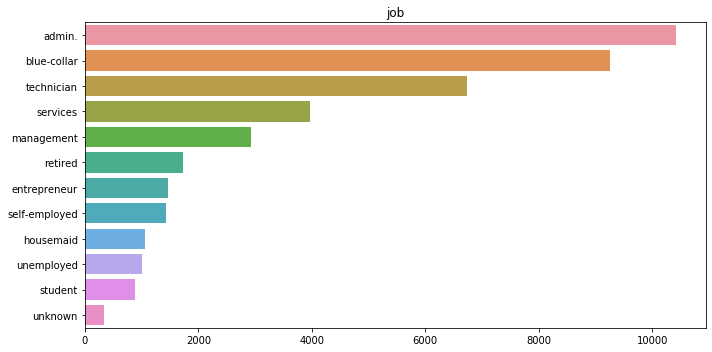

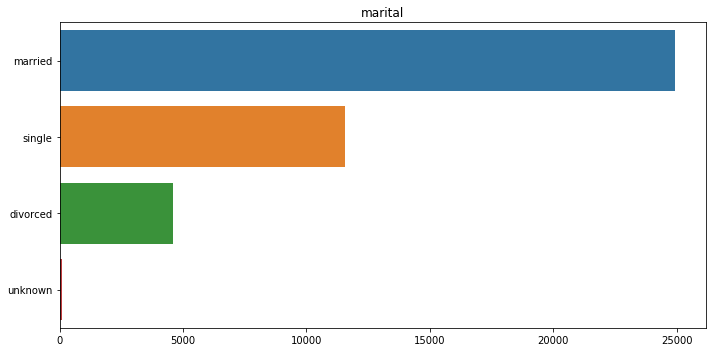

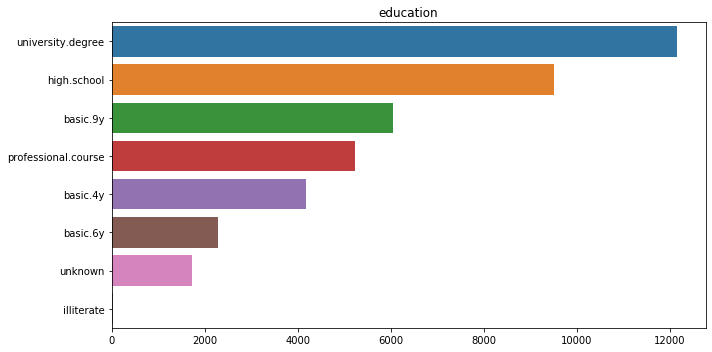

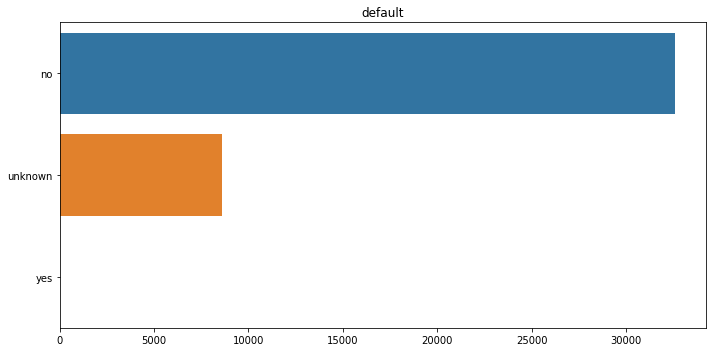

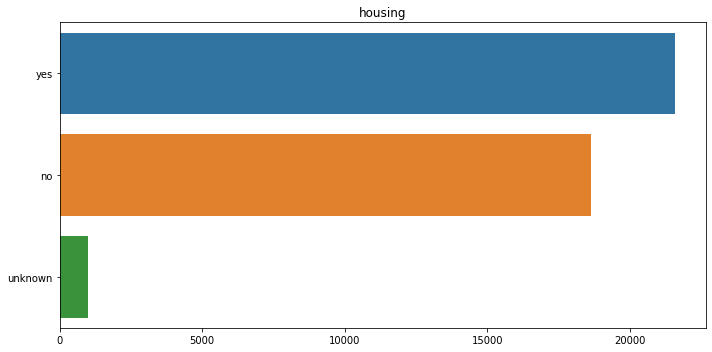

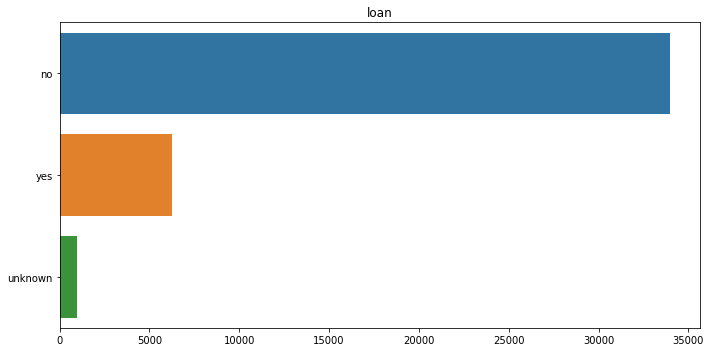

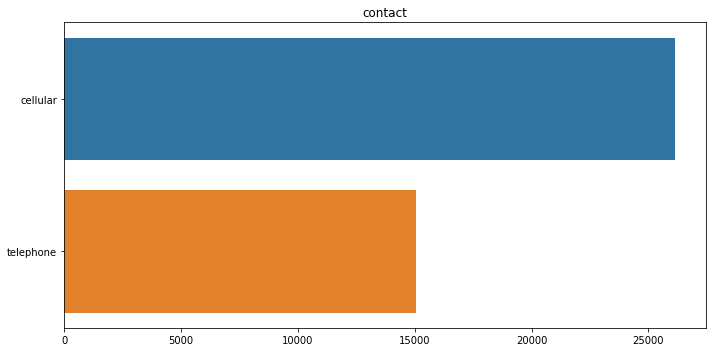

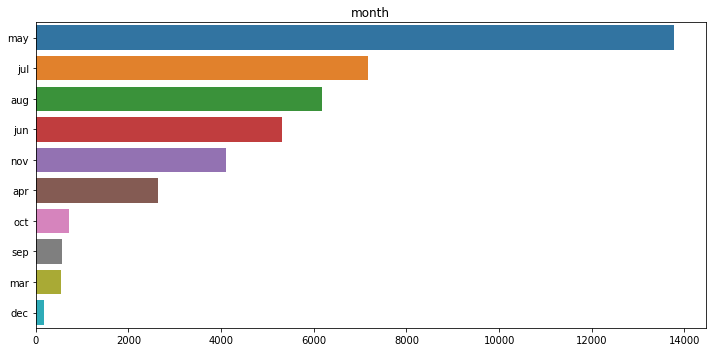

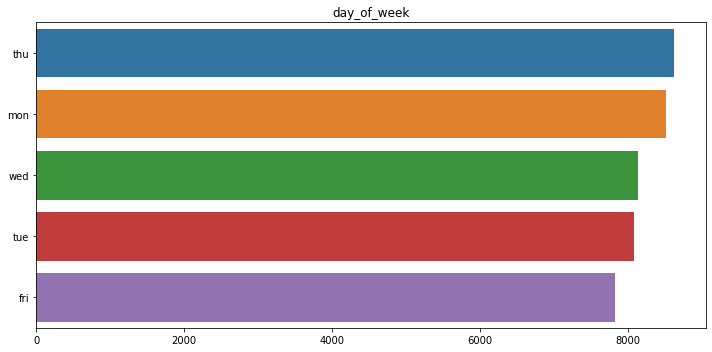

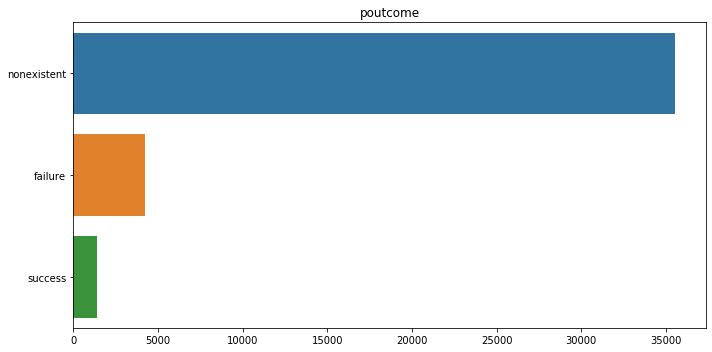

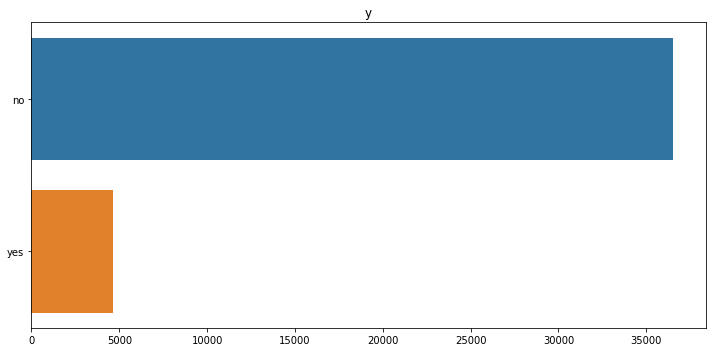

In [32]:
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index, data=data)    
    plt.title(col)    
    plt.tight_layout()

## Our observations:

Job:The audiences of these campaigns target mostly administrators, blue-collars, and technicians.

Marital status: Most of them are married; married clients are twice as single people.

Education: Most clients have university education level while illiterate people are very less.

default/credit: Most people have no default stay on their credit file.

housing: Most people have no housing loan.

loan: Most people have no personal loan.

contact: Common means of communication are cellular.

month - May is the busy month and December is the least busy month (because of the holidays season).

day of week: Thursday is the most busy day while Friday is the least busy day of the week.

### Subscription to the term deposit

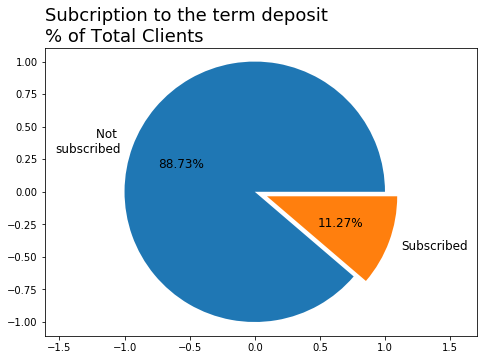

In [33]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')
plt.show()

11.27% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.27%.

In the next section, we will balance the classes.

### Top 5 of highly successful campaigns

Now, we will print out the campaigns that the largest number of customers participate in

In [34]:
# We will groupby then count
data.groupby(['campaign'])['y'].count().reset_index().sort_values(by='y', ascending=False).iloc[:5]


,campaign,y
0,1,17642
1,2,10570
2,3,5341
3,4,2651
4,5,1599


#### What is the target audience?
#### Which customers were more likely to subscribe to the term deposit?¶

Text(0, 0.5, 'Frequency of Purchase')

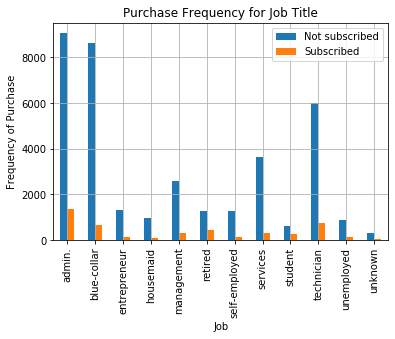

In [35]:
table = pd.crosstab(data.job, data.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [36]:
table = pd.crosstab(data.job, data.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: subcribed, dtype: float64

The target customers are admins,blue-collars and techinicians but the frequency of students and retired people subscribed to the term deposit are pretty high (28.68% for students and 22.79% for retired people).

### Role of marital status in subscription behaviour

Text(0, 0.5, 'Proportion of Customers')

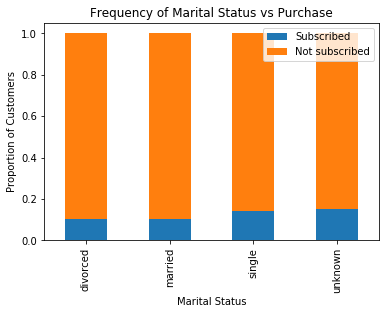

In [37]:
table = pd.crosstab(data.marital,data.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

There is no significant impact of marital status on subscription behaviour of customers.

### feature engineering

Although "duration" feature highly affects the output target, this value is not known before a call is performed. Hence; this feature should been discarded from the list of features to predict.

And as we have seen singularity in "pdays " we are droping the column

In [38]:
data = data.drop(['duration','pdays'], axis=1)

### Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features based on Random Forest

d. Handling unbalanced data using SMOTE

e. Standardize the data using the anyone of the scalers provided by sklearn

### Missing Value Analysis

In [39]:
# Find total missing data in all features
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
y,0,0.0
month,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day_of_week,0,0.0


Luckily, our dataset does not contain missing data. 

In [40]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [41]:
fc

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y'], dtype=object)

In [42]:
num = data[nc]
num

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6


In [43]:
new_data  = data.copy()

In [44]:
new_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [45]:
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [46]:
dfc =np.array(['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome'])
dfc

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], dtype='<U11')

In [47]:
for f in dfc:
    dummy=pd.get_dummies(data[f],drop_first=True,prefix=f)
    new_data= new_data.join(dummy)
    

In [48]:
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0


In [49]:
new_data.y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [50]:
new_data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#  b.  we have done label encoding for Y-variable

In [51]:
new_data.y.replace({'no':0,'yes':1},inplace=True)

In [52]:
new_data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# we are dopping the originals as we have added dummy variables in dataset

In [53]:
new_data = new_data.drop(['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome'],axis=1)
new_data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,0,1,0,0,0,0,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0


In [54]:
#import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
rf_data=new_data.copy()
rf_data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,0,1,0,0,0,0,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0


In [56]:
rf_data.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      

In [58]:
rf_data.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [59]:
rf_data.y = rf_data.y.astype('category')

In [60]:
data_std = rf_data[nc]
data_std

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6


# e. Standardize the data using the anyone of the scalers provided by sklearn


In [61]:
#create an instance of minmax scaler
minmax = preprocessing.MinMaxScaler()

In [62]:
#standardization to be done only on the features
scaledvals=minmax.fit_transform(data_std.iloc[:,:])
scaledvals

array([[0.48148148, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.01818182, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.03636364, 0.14285714, ..., 0.        , 0.08932215,
        0.        ]])

In [63]:
data_std.iloc[:,:]=scaledvals

C:\Users\mayur\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
data_std

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


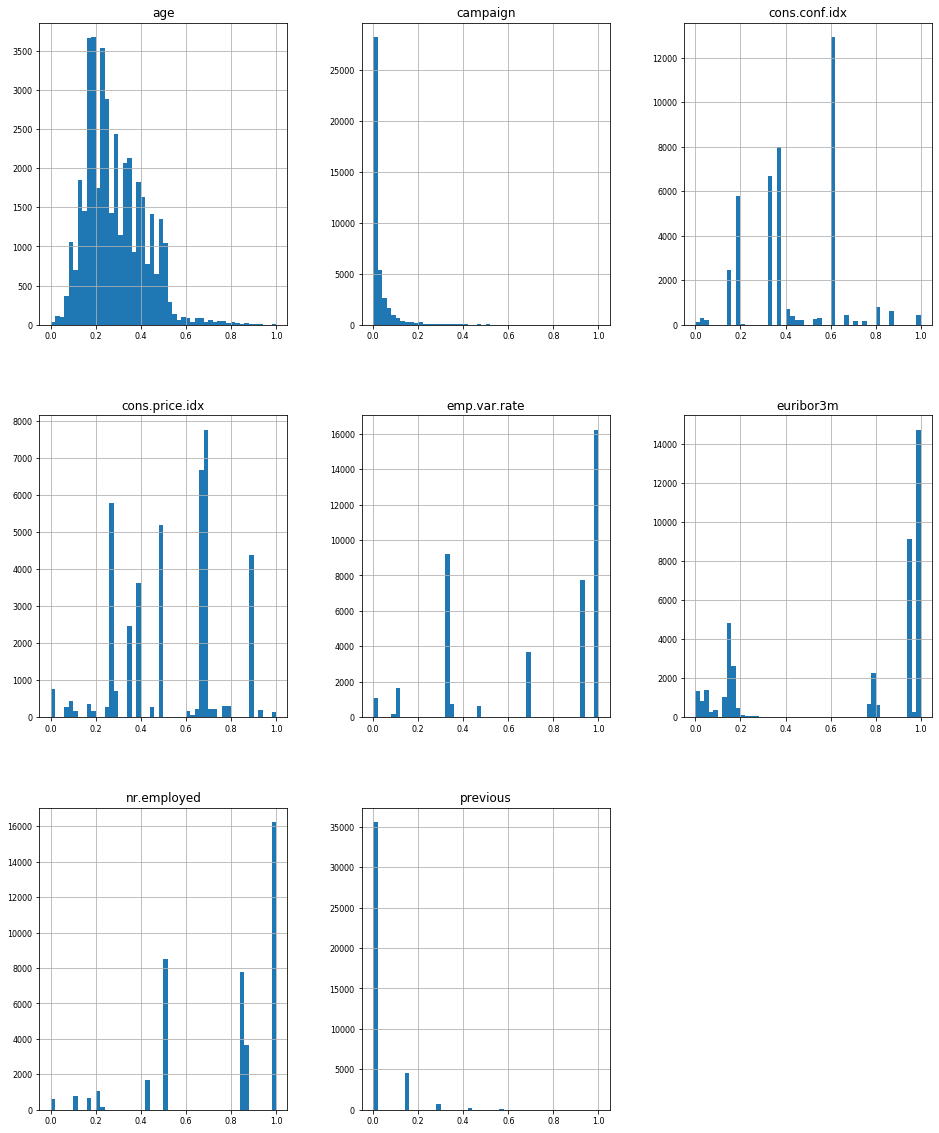

In [65]:
# Check again distribution of numerical data
data_std.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [66]:
rf_data = rf_data.drop(['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)
rf_data

,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [67]:
rf_data= rf_data.join(data_std)
rf_data

,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0.493827,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0.246914,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0.283951,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,1,0,0,0,0,...,1,0,0.691358,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0,1,0,0,0,0,0,0,0,0,...,1,0,0.358025,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0,0,0,0,0,1,0,0,0,0,...,1,0,0.481481,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,1,0,0,0,0,0,0,0,0,1,...,1,0,0.333333,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


In [68]:
rf_data.dtypes

y                                category
job_blue-collar                     uint8
job_entrepreneur                    uint8
job_housemaid                       uint8
job_management                      uint8
job_retired                         uint8
job_self-employed                   uint8
job_services                        uint8
job_student                         uint8
job_technician                      uint8
job_unemployed                      uint8
job_unknown                         uint8
marital_married                     uint8
marital_single                      uint8
marital_unknown                     uint8
education_basic.6y                  uint8
education_basic.9y                  uint8
education_high.school               uint8
education_illiterate                uint8
education_professional.course       uint8
education_university.degree         uint8
education_unknown                   uint8
default_unknown                     uint8
default_yes                       

# here we scaled the numeric varaibles and added the data which contained dummy varaibles of category and y- varaible is encoded

# Random Forest

In [69]:
#split the data into train and test
trainx,testx,trainy,testy = train_test_split(rf_data.drop('y',axis=1),rf_data.y,test_size=0.3)

In [70]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(28831, 51),trainy=(28831,),testx=(12357, 51),testy =(12357,)


In [71]:
#random forest mopdel
m1=RandomForestClassifier().fit(trainx,trainy)
RandomForestClassifier()

RandomForestClassifier()

In [72]:
p1=m1.predict(testx)
p1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
#accuracy
rf1 = accuracy_score(testy,p1)
rf1

0.8962531358744031

In [74]:
#confusion matrix
confusion_matrix(testy,p1)  

array([[10665,   325],
       [  957,   410]], dtype=int64)

In [75]:
#classification_report
print(classification_report(testy,p1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10990
           1       0.56      0.30      0.39      1367

    accuracy                           0.90     12357
   macro avg       0.74      0.64      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [76]:
#2)use crosstab for a detailed  CM
df1=pd.DataFrame({'actual':testy,'predicted':p1 })
pd.crosstab(df1.actual,df1.predicted,margins=True)

predicted,0,1,All
actual,,,
0,10665,325,10990
1,957,410,1367
All,11622,735,12357


In [77]:
pd.crosstab(df1.predicted,df1.actual,margins=True) #interchange

actual,0,1,All
predicted,,,
0,10665,957,11622
1,325,410,735
All,10990,1367,12357


In [78]:
m1.feature_importances_

array([1.47325320e-02, 6.57462222e-03, 4.74563419e-03, 1.18060698e-02,
       7.54559948e-03, 7.53162625e-03, 1.10216489e-02, 6.09968944e-03,
       1.78612403e-02, 6.00622075e-03, 2.37281896e-03, 2.23733805e-02,
       1.85946516e-02, 1.00121280e-03, 7.40948732e-03, 1.28829744e-02,
       1.75193983e-02, 2.92055419e-04, 1.32441737e-02, 1.80872412e-02,
       7.60782013e-03, 1.52995313e-02, 2.29096508e-07, 3.69504469e-03,
       4.01734791e-02, 3.72878029e-03, 2.40473351e-02, 1.57707049e-02,
       2.44615335e-03, 8.56678421e-04, 2.83497172e-03, 3.15075560e-03,
       5.37129029e-03, 7.00933919e-03, 2.16604488e-03, 5.21814178e-03,
       2.51235266e-03, 1.61078720e-02, 1.65597668e-02, 1.66128914e-02,
       1.61634323e-02, 1.21609544e-02, 3.73191164e-02, 1.72307643e-01,
       8.36835946e-02, 1.95320032e-02, 2.43881783e-02, 2.42973367e-02,
       2.34146114e-02, 1.37361615e-01, 5.05000548e-02])

In [79]:
len(m1.feature_importances_)

51

# c. Selecting important features based on Random Forest

In [80]:
scores=pd.DataFrame({'features':cols,'score':m1.feature_importances_})
scores.sort_values('score',ascending=False,inplace=True) #inplace-> it will do function and savesin dataframe 
print(scores)

                         features         score
43                      month_oct  1.723076e-01
49           poutcome_nonexistent  1.373616e-01
44                      month_sep  8.368359e-02
50               poutcome_success  5.050005e-02
24          education_high.school  4.017348e-02
42                      month_nov  3.731912e-02
46                day_of_week_thu  2.438818e-02
47                day_of_week_tue  2.429734e-02
26  education_professional.course  2.404734e-02
48                day_of_week_wed  2.341461e-02
11                 job_management  2.237338e-02
45                day_of_week_mon  1.953200e-02
12                    job_retired  1.859465e-02
19                marital_married  1.808724e-02
8                 job_blue-collar  1.786124e-02
16                 job_technician  1.751940e-02
39                      month_jun  1.661289e-02
38                      month_jul  1.655977e-02
40                      month_mar  1.616343e-02
37                      month_dec  1.610

# d. Handling unbalanced data using SMOTE

In [81]:
rf_data.shape

(41188, 52)

In [82]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

train_x_smote, train_y_smote = smote.fit_resample(trainx,trainy)

from collections import Counter

print("Before SMOTE:" , Counter(trainy))
print('After SMOTE:' , Counter(train_y_smote))


Before SMOTE: Counter({0: 25558, 1: 3273})
After SMOTE: Counter({0: 25558, 1: 25558})


In [83]:
train_x_smote

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_nonexistent,poutcome_success,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.148148,0.018182,0.142857,0.333333,0.340608,0.154812,0.174790,0.512287
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0.444444,0.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0.370370,0.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0.098765,0.018182,0.000000,0.000000,0.174591,0.866109,0.018136,0.203781
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0.111111,0.036364,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51111,0,0,0,0,1,0,0,0,0,0,...,1,0,0.851852,0.031831,0.000000,0.479167,0.778644,0.556485,0.055883,0.000000
51112,0,0,0,0,0,0,0,0,0,0,...,1,0,0.170777,0.000000,0.000000,1.000000,0.669135,0.338912,0.981296,1.000000
51113,0,0,0,0,0,0,0,0,0,0,...,1,0,0.135817,0.039987,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000
51114,0,0,0,0,0,0,0,0,0,0,...,1,0,0.164204,0.015226,0.000000,0.687500,0.389322,0.368201,0.775298,0.877883


In [84]:
train_x_smote.dtypes

job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.school              uint8
education_illiterate               uint8
education_professional.course      uint8
education_university.degree        uint8
education_unknown                  uint8
default_unknown                    uint8
default_yes                        uint8
housing_unknown                    uint8
housing_yes     

In [85]:
 train_y_smote

0        0
1        0
2        0
3        0
4        0
        ..
51111    1
51112    1
51113    1
51114    1
51115    1
Name: y, Length: 51116, dtype: category
Categories (2, int64): [0, 1]

# Q3. Build the following Supervised Learning models:
    
a. Logistic Regression

b. AdaBoost

c. Naïve Bayes

d. KNN

e. SVM


# a. Logistic Regression

In [86]:
#build the logistic regression model using Logit()
m2=sm.Logit(trainy,trainx).fit()

         Current function value: 0.277438
         Iterations: 35


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [87]:
#summary
m2.summary()

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28781
Method:                           MLE   Df Model:                           49
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.2159
Time:                        20:15:56   Log-Likelihood:                -7998.8
converged:                      False   LL-Null:                       -10201.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
job_blue-collar                  -0.1512      0.081     -1.856      0.063      -0.311       0.008
job_entrepreneur                 -0.0710      0.127     -0.559      0.576      -0.320       0.178
job_housemaid                    -0.1708      0.156     -1.097      0.273      -0.476       0.134
job_management                   -0.0675      0.089     -0.755      0.450      -0.243       0.108
job_retired                       0.2069      0.113      1.834      0.067      -0.014       0.428
job_self-employed                -0.0669      0.120     -0.556      0.578      -0.303       0.169
job_services                     -0.1015      0.089     -1.144      0.253      -0.275       0.072
job_student                       0.2240      0.120      1.871      0.061      -0.011       0.459
job_technician                   -0.0408      0.074     -0.550      0.582      -0.186       0.104
job_unemployed                   -0.0206      0.132     -0.156      0.876      -0.280       0.239
job_unknown                      -0.3565      0.266     -1.339      0.181      -0.878       0.165
marital_married                   0.0145      0.071      0.206      0.837      -0.124       0.153
marital_single                    0.0322      0.080      0.401      0.689      -0.126       0.190
marital_unknown                   0.5484      0.442      1.240      0.215      -0.318       1.415
education_basic.6y                0.0760      0.123      0.618      0.536      -0.165       0.317
education_basic.9y               -0.0098      0.097     -0.101      0.920      -0.201       0.181
education_high.school             0.0073      0.095      0.077      0.939      -0.178       0.193
education_illiterate              1.1831      0.778      1.520      0.129      -0.342       2.709
education_professional.course     0.0624      0.104      0.601      0.548      -0.141       0.266
education_university.degree       0.0723      0.094      0.768      0.443      -0.112       0.257
education_unknown                 0.0400      0.125      0.320      0.749      -0.205       0.285
default_unknown                  -0.1799      0.068     -2.650      0.008      -0.313      -0.047
default_yes                     -13.9780   3202.424     -0.004      0.997   -6290.614    6262.658
housing_unknown                  -0.0075        nan        nan        nan         nan         nan
housing_yes                      -0.0235      0.043     -0.548      0.583      -0.108       0.061
loan_unknown                     -0.0075        nan        nan        nan         nan         nan
loan_yes                         -0.0276      0.060     -0.464      0.643      -0.144       0.089
contact_telephone                -0.6690      0.076     -8.785      0.000      -0.818      -0.520
month_aug                         0.1832      0.119      1.544      0.123      -0.049       0.416
month_dec                        -0.0632      0.211     -0.299      0.765      -0.477       0.351
month_j

In [88]:
p2 = m2.predict(testx)
p2

38540    0.483663
11528    0.039702
28689    0.169015
35477    0.042083
3014     0.041451
           ...   
2941     0.042726
16638    0.046103
25278    0.049936
22165    0.058459
25215    0.031354
Length: 12357, dtype: float64

In [89]:
#converting probabilities into classes 
p1_Y = p2.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [90]:
#confusion matrix
confusion_matrix(testy,p1_Y)

array([[10823,   167],
       [ 1054,   313]], dtype=int64)

In [91]:
lg1 = accuracy_score(testy,p1_Y)
lg1

0.9011896091284293

In [92]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})
df

,actual,predicted
38540,1,0.0
11528,0,0.0
28689,0,0.0
35477,0,0.0
3014,0,0.0
...,...,...
2941,0,0.0
16638,0,0.0
25278,0,0.0
22165,0,0.0


In [93]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,10823,167,10990
1,1054,313,1367
All,11877,480,12357


In [94]:
#classification_report
print(classification_report(testy,p1_Y))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10990
           1       0.65      0.23      0.34      1367

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [95]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.9011896091284293


In [96]:
#AUC/ROC
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

In [97]:
#auc score
auc_score = metrics.auc(fpr,tpr)
print("AUC for model =",auc_score)

AUC for model = 0.6068864559322068


Text(0, 0.5, 'TPR')

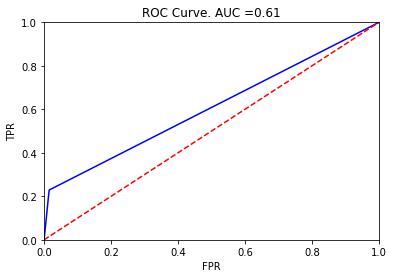

In [98]:
#plot for ROC 
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC ='+str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [99]:
#feature selection
features = trainx.columns
score,pval = f_classif(trainx,trainy)

In [100]:
df_scores = pd.DataFrame({'feature':features,'score':score,'pvalue':pval})

In [101]:
#sort the dataset in the descending order of scores
df_scores.sort_values('score',ascending=False,inplace=True)
print(df_scores)

                          feature        score         pvalue
50                    nr.employed  4207.220265   0.000000e+00
42               poutcome_success  3109.021853   0.000000e+00
49                      euribor3m  3083.569110   0.000000e+00
46                   emp.var.rate  2899.224927   0.000000e+00
45                       previous  1554.262574   0.000000e+00
41           poutcome_nonexistent  1116.641964  3.077655e-240
32                      month_mar   655.198290  6.548218e-143
27              contact_telephone   638.017150  2.956260e-139
47                 cons.price.idx   584.708537  6.678373e-128
35                      month_oct   584.357339  7.934950e-128
36                      month_sep   460.553360  2.266376e-101
33                      month_may   341.049043   1.031785e-75
21                default_unknown   266.978292   9.600253e-60
7                     job_student   254.452412   4.876723e-57
4                     job_retired   228.145698   2.379306e-51
29      

In [102]:
#VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['inflation']=[variance_inflation_factor(trainx.values,i)
for i in range (trainx.shape[1])]

vif['features'] =list(trainx.columns)

vif
  
    
    #consider  VIF> 10 to remove coolinearity
    #sometimes VIF > 6 is also taken as the cutoff

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,inflation,features
0,3.080163,job_blue-collar
1,1.180591,job_entrepreneur
2,1.214077,job_housemaid
3,1.349342,job_management
4,1.568875,job_retired
5,1.161050,job_self-employed
6,1.569444,job_services
7,1.219882,job_student
8,2.096089,job_technician
9,1.127842,job_unemployed


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [104]:
X = new_data.iloc[:,:-1]
df1 = calc_vif(X)
df1.sort_values(["VIF"],ascending=False)
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
32,housing_unknown,inf
34,loan_unknown,inf
7,nr.employed,8.221698e+04
4,cons.price.idx,6.506099e+04
6,euribor3m,7.906914e+02
5,cons.conf.idx,3.887992e+02
3,emp.var.rate,9.429857e+01
50,poutcome_nonexistent,3.592476e+01
0,age,2.659405e+01
37,month_aug,8.191163e+00


# b. AdaBoost

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
#create adabooster classifier object
AdaModel = AdaBoostClassifier(n_estimators=50,learning_rate=1.0,)

In [107]:
#train adaboost classifier
m3 = AdaModel.fit(trainx,trainy)

In [108]:
#predict for test data
p3 = m3.predict(testx)
p3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
from sklearn import metrics
print("Acccuracy:",metrics.accuracy_score(testy,p3))

Acccuracy: 0.9007040543821316


In [110]:
#classification_report
print(classification_report(testy,p3))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10990
           1       0.65      0.22      0.33      1367

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [111]:
ADA = metrics.accuracy_score(testy,p3)
ADA

0.9007040543821316

# c. Naïve Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
#build the model and predict
m4=GaussianNB().fit(trainx,trainy)

In [114]:
p4=m4.predict(testx)
p4

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
#classification_report
print(classification_report(testy,p4))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     10990
           1       0.29      0.62      0.40      1367

    accuracy                           0.79     12357
   macro avg       0.62      0.72      0.64     12357
weighted avg       0.87      0.79      0.82     12357



In [116]:
#accuracy
nv = accuracy_score(testy,p4)
nv

0.7929109007040543

In [117]:
#confusion matrix
df=pd.DataFrame({'actual':testy,'pred':p4})

In [118]:
pd.crosstab(df.actual,df.pred,margins=True)

pred,0,1,All
actual,,,
0,8944,2046,10990
1,513,854,1367
All,9457,2900,12357


# d. KNN

In [119]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split,cross_val_score

In [120]:
nn=range(3,12,2)
list(nn)

[3, 5, 7, 9, 11]

In [121]:
#store the accuracy of cv for every value of k
cv_score=[]
for k in nn:
    model=neighbors.KNeighborsClassifier(n_neighbors =k)
    acc=cross_val_score(model,trainx,trainy,cv=5,scoring='accuracy')
    acc = np.round(np.mean(acc),3)
    cv_score.append(acc)

In [122]:
#print the accuracy for each k 
print(cv_score)

[0.882, 0.887, 0.89, 0.891, 0.892]


In [123]:
cv_score.index(max(cv_score))

4

In [124]:
nn[cv_score.index(max(cv_score))]

11

In [125]:
#optimal k 
bestk=nn[cv_score.index(max(cv_score))]
print("best k =",bestk)

best k = 11


Text(0.5, 1.0, 'Best Value of K based on CV accuracy')

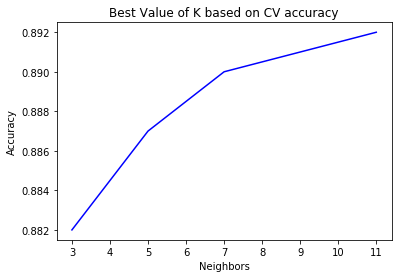

In [126]:
#plot the  chart to determinre the best k
plt.plot(nn,cv_score,color='blue')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Best Value of K based on CV accuracy')

In [127]:
#KNN model and prediction using the best K
m5=neighbors.KNeighborsClassifier(n_neighbors=bestk,metric='manhattan').fit(trainx,trainy)



In [128]:
p5=m5.predict(testx)
p5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
#accuracy
kn = accuracy_score(testy,p5)
kn

0.8960103585012543

In [130]:
#confusion matrix
cm=pd.DataFrame({'actual':testy,'predicted':p5})
pd.crosstab(cm.actual,cm.predicted,margins=True)


predicted,0,1,All
actual,,,
0,10759,231,10990
1,1054,313,1367
All,11813,544,12357


In [131]:
print(classification_report(testy,p5))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10990
           1       0.58      0.23      0.33      1367

    accuracy                           0.90     12357
   macro avg       0.74      0.60      0.64     12357
weighted avg       0.87      0.90      0.88     12357



# e. SVM

### as the data set huge we will use vif and also do undersampling

In [132]:
vif_data =(['housing_unknown','loan_unknown','nr.employed','cons.price.idx','euribor3m','cons.conf.idx','emp.var.rate','poutcome_nonexistent','age','month_aug','month_may','marital_married','y'])
vif_data

['housing_unknown',
 'loan_unknown',
 'nr.employed',
 'cons.price.idx',
 'euribor3m',
 'cons.conf.idx',
 'emp.var.rate',
 'poutcome_nonexistent',
 'age',
 'month_aug',
 'month_may',
 'marital_married',
 'y']

In [133]:
svm_data = rf_data[vif_data]
svm_data

,housing_unknown,loan_unknown,nr.employed,cons.price.idx,euribor3m,cons.conf.idx,emp.var.rate,poutcome_nonexistent,age,month_aug,month_may,marital_married,y
0,0,0,0.859735,0.698753,0.957379,0.60251,0.937500,1,0.481481,0,1,1,0
1,0,0,0.859735,0.698753,0.957379,0.60251,0.937500,1,0.493827,0,1,1,0
2,0,0,0.859735,0.698753,0.957379,0.60251,0.937500,1,0.246914,0,1,1,0
3,0,0,0.859735,0.698753,0.957379,0.60251,0.937500,1,0.283951,0,1,1,0
4,0,0,0.859735,0.698753,0.957379,0.60251,0.937500,1,0.481481,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0.000000,1.000000,0.089322,0.00000,0.479167,1,0.691358,0,0,1,1
41184,0,0,0.000000,1.000000,0.089322,0.00000,0.479167,1,0.358025,0,0,1,0
41185,0,0,0.000000,1.000000,0.089322,0.00000,0.479167,1,0.481481,0,0,1,0
41186,0,0,0.000000,1.000000,0.089322,0.00000,0.479167,1,0.333333,0,0,1,1


In [134]:
svm_data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Undersamplimg

In [135]:
# Class count
count_class_0, count_class_1 = svm_data.y.value_counts()

# Divide by class
df_class_0 = svm_data[svm_data['y'] == 0]
df_class_1 = svm_data[svm_data['y'] == 1]

In [136]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

Random under-sampling:
1    4640
0    4640
Name: y, dtype: int64


In [137]:
X = df_test_under.drop('y',axis='columns')
y = df_test_under['y']


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [139]:
# Number of classes in training Data
y_train.value_counts()

1    3712
0    3712
Name: y, dtype: int64

In [140]:
lov_C = range(1,11)
lov_C

range(1, 11)

In [141]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [142]:
cv_scores = []

for c in lov_C:
    model=svm.SVC(C=c,kernel='linear')
    acc = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    acc = np.round(np.mean(acc),3)
    cv_scores.append(acc)

In [143]:
cv_scores

[0.717, 0.717, 0.717, 0.717, 0.717, 0.717, 0.717, 0.717, 0.717, 0.717]

In [144]:
max(cv_scores)

0.717

In [145]:
bestC = lov_C[cv_scores.index(max(cv_scores))]
print(" Best C =",bestC)

 Best C = 1


In [146]:
#build the model using the best C 
#1) kernel = 'linear'
m6 = svm.SVC(C=bestC,kernel='linear').fit(X_train,y_train)
m6

SVC(C=1, kernel='linear')

In [147]:
p6= m6.predict(X_test)
p6

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [184]:
#accuracy
svml =accuracy_score(y_test,p6)
svml

0.7198275862068966

In [149]:
print(classification_report(y_test,p6))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       928
           1       0.72      0.72      0.72       928

    accuracy                           0.72      1856
   macro avg       0.72      0.72      0.72      1856
weighted avg       0.72      0.72      0.72      1856



In [150]:
df=pd.DataFrame({'actual':y_test,'predicted':p6})
ct1 =pd.crosstab(df.actual,df.predicted,margins=True)
ct1

predicted,0,1,All
actual,,,
0,672,256,928
1,264,664,928
All,936,920,1856


In [151]:
#2)lernel = 'svcLinear', C=bestC
m7=svm.LinearSVC(C=bestC,max_iter=1200).fit(X_train,y_train)
m7

LinearSVC(C=1, max_iter=1200)

In [152]:
p7=m7.predict(X_test)
p7

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [153]:
accuracy_score(y_test,p7)

0.7273706896551724

In [154]:
df=pd.DataFrame({'actual':y_test,'predicted':p7})
ct2 = pd.crosstab(df.actual,df.predicted,margins=True)
ct2

predicted,0,1,All
actual,,,
0,799,129,928
1,377,551,928
All,1176,680,1856


In [155]:
print(classification_report(y_test,p7))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       928
           1       0.81      0.59      0.69       928

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.72      1856
weighted avg       0.74      0.73      0.72      1856



In [156]:
#determine the best and Gamma for poly,signmoid and rbf
lov_C = range(1,11)
lov_G = np.linspace(0.1,0.99,10)  #linspace -->between 2 numbr=ers equal space

In [157]:
cv_scores = []
cg = []

for c in lov_C:
    for g in lov_G:
        model=svm.SVC(kernel='rbf',C=c,gamma=g)
        acc = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
        acc = np.round(np.mean(acc),3)
        cv_scores.append(acc)
        cg.append(str(c)+":"+str(g))

In [158]:
print(cv_scores,end =" ")

[0.735, 0.735, 0.735, 0.735, 0.734, 0.731, 0.732, 0.732, 0.732, 0.732, 0.735, 0.735, 0.735, 0.734, 0.732, 0.732, 0.732, 0.734, 0.736, 0.736, 0.735, 0.735, 0.735, 0.732, 0.732, 0.733, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.735, 0.732, 0.733, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.734, 0.732, 0.735, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.733, 0.733, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.732, 0.734, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.732, 0.736, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.735, 0.732, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735, 0.735, 0.735, 0.732, 0.736, 0.736, 0.736, 0.736, 0.736, 0.735, 0.735] 

In [159]:
print(cg,end = " ")

['1:0.1', '1:0.1988888888888889', '1:0.2977777777777778', '1:0.3966666666666666', '1:0.4955555555555555', '1:0.5944444444444444', '1:0.6933333333333332', '1:0.7922222222222222', '1:0.8911111111111111', '1:0.99', '2:0.1', '2:0.1988888888888889', '2:0.2977777777777778', '2:0.3966666666666666', '2:0.4955555555555555', '2:0.5944444444444444', '2:0.6933333333333332', '2:0.7922222222222222', '2:0.8911111111111111', '2:0.99', '3:0.1', '3:0.1988888888888889', '3:0.2977777777777778', '3:0.3966666666666666', '3:0.4955555555555555', '3:0.5944444444444444', '3:0.6933333333333332', '3:0.7922222222222222', '3:0.8911111111111111', '3:0.99', '4:0.1', '4:0.1988888888888889', '4:0.2977777777777778', '4:0.3966666666666666', '4:0.4955555555555555', '4:0.5944444444444444', '4:0.6933333333333332', '4:0.7922222222222222', '4:0.8911111111111111', '4:0.99', '5:0.1', '5:0.1988888888888889', '5:0.2977777777777778', '5:0.3966666666666666', '5:0.4955555555555555', '5:0.5944444444444444', '5:0.6933333333333332', '5

In [160]:
#highest accuracy and the best C and Gamma
best = cg[cv_scores.index(max(cv_scores))]

In [161]:
max(cv_scores)

0.736

In [162]:
cv_scores.index(max(cv_scores))

18

In [163]:
cg[cv_scores.index(max(cv_scores))]

'2:0.8911111111111111'

In [164]:
best.split(":")

['2', '0.8911111111111111']

In [165]:
bestC = int(best.split(":")[0])
bestC

2

In [167]:
bestG = float(best.split(":")[1])
bestG

0.8911111111111111

In [168]:
#build the models where kernels is('rbf','sigmoid','poly')
m8 = svm.SVC(kernel='rbf',C=bestC,gamma=bestG).fit(X_train,y_train)
m8

SVC(C=2, gamma=0.8911111111111111)

In [170]:
p8=m8.predict(X_test)
p8

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [171]:
#kernel = 'sigmouid'
m9 = svm.SVC(kernel='sigmoid',C=bestC,gamma=bestG).fit(X_train,y_train)
m9

SVC(C=2, gamma=0.8911111111111111, kernel='sigmoid')

In [172]:
p9=m9.predict(X_test)
p9

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [173]:
#kernel = 'poly'
m10 = svm.SVC(kernel='poly',C=bestC,gamma=bestG).fit(X_train,y_train)
m10

SVC(C=2, gamma=0.8911111111111111, kernel='poly')

In [174]:
p10=m10.predict(X_test)
p10

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [175]:
accuracy_score(y_test,p8)

0.7311422413793104

In [176]:
accuracy_score(y_test,p9)

0.6950431034482759

In [177]:
accuracy_score(y_test,p10)

0.7311422413793104

In [178]:
df=pd.DataFrame({'actual':y_test,'predicted':p8})
ct3 = pd.crosstab(df.actual,df.predicted,margins=True)
ct3

predicted,0,1,All
actual,,,
0,798,130,928
1,369,559,928
All,1167,689,1856


In [179]:
df=pd.DataFrame({'actual':y_test,'predicted':p9})
ct4 = pd.crosstab(df.actual,df.predicted,margins=True)
ct4

predicted,0,1,All
actual,,,
0,651,277,928
1,289,639,928
All,940,916,1856


In [180]:
df=pd.DataFrame({'actual':y_test,'predicted':p10})
ct5 = pd.crosstab(df.actual,df.predicted,margins=True)
ct5

predicted,0,1,All
actual,,,
0,798,130,928
1,369,559,928
All,1167,689,1856


In [181]:
print(classification_report(y_test,p8))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       928
           1       0.81      0.60      0.69       928

    accuracy                           0.73      1856
   macro avg       0.75      0.73      0.73      1856
weighted avg       0.75      0.73      0.73      1856



In [182]:
print(classification_report(y_test,p9))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       928
           1       0.70      0.69      0.69       928

    accuracy                           0.70      1856
   macro avg       0.70      0.70      0.70      1856
weighted avg       0.70      0.70      0.70      1856



In [183]:
print(classification_report(y_test,p10))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       928
           1       0.81      0.60      0.69       928

    accuracy                           0.73      1856
   macro avg       0.75      0.73      0.73      1856
weighted avg       0.75      0.73      0.73      1856



# Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [185]:
dataframe = {'Models':['Random Forest','Logistic Regression', 'KNN','Naive Bayes','AdaBoost','svm'],
        'Accuracy':[rf1,lg1,kn,nv,ADA,svml]}


# In[51]:


# Create DataFrame
df = pd.DataFrame(dataframe)
  
# Print the output.
df

,Models,Accuracy
0,Random Forest,0.896253
1,Logistic Regression,0.901190
2,KNN,0.896010
3,Naive Bayes,0.792911
4,AdaBoost,0.900704
5,svm,0.719828


# Logistic Regression and AdaBoost model performs better in predicting if the client will subscribe to term deposit or not